# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.  
  
### Description of fnlwgt (final weight)  
  
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:  
  
  1. A single cell estimate of the population 16+ for each state.  
  2. Controls for Hispanic Origin by age and sex.  
  3. Controls by Race, age and sex.  
  
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Problem statement: In this dataset predict:

Does a person makes over $50K a year.

## Importing Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import lazypredict

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

## Understanding the Data

In [3]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
df['Hours_per_week'].value_counts()

Hours_per_week
40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: count, Length: 94, dtype: int64

In [9]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
Occupation
 Prof-specialty       4140
 Craft-repair 

## Preparation of the Data

In [10]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
df = df.rename(columns={'Income': 'Income >50K'})


df['Income >50K'] = df['Income >50K'].apply(lambda x: 1 if x == ' >50K' else 0)

In [13]:
df['Income >50K'].value_counts()

Income >50K
0    24719
1     7841
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income >50K     32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


## Understanding Features

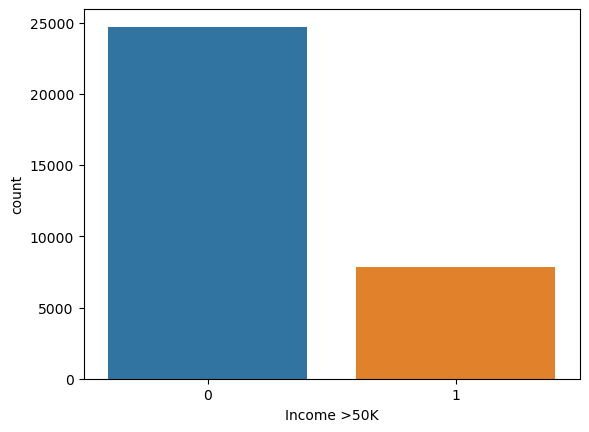

In [15]:
sns.countplot(x='Income >50K', data=df);

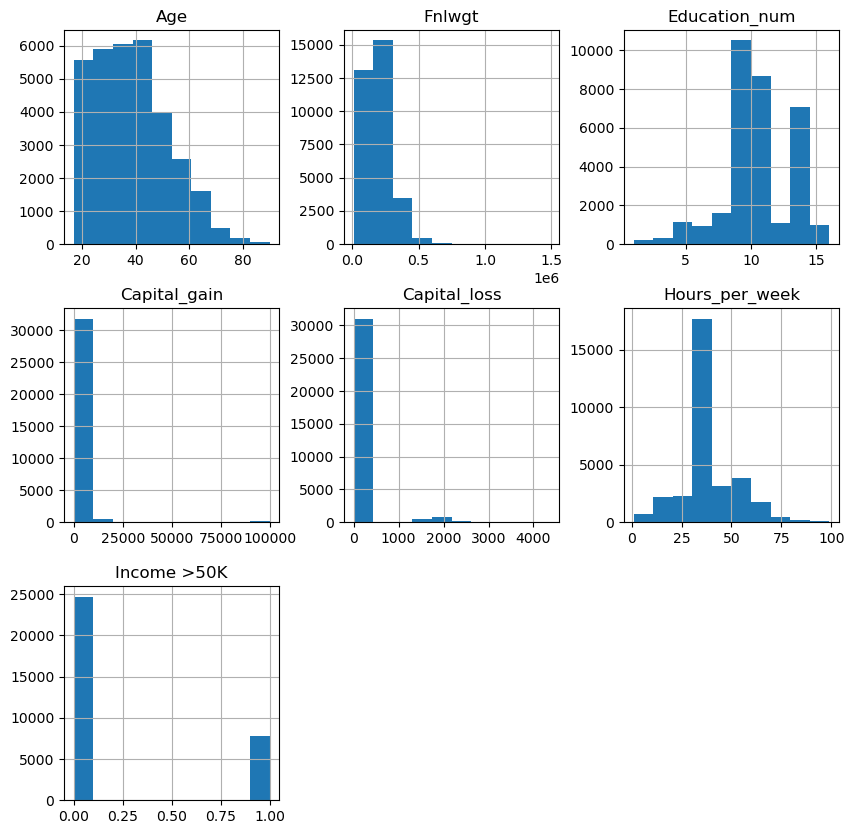

In [16]:
df.hist(bins=10,figsize=(10,10));

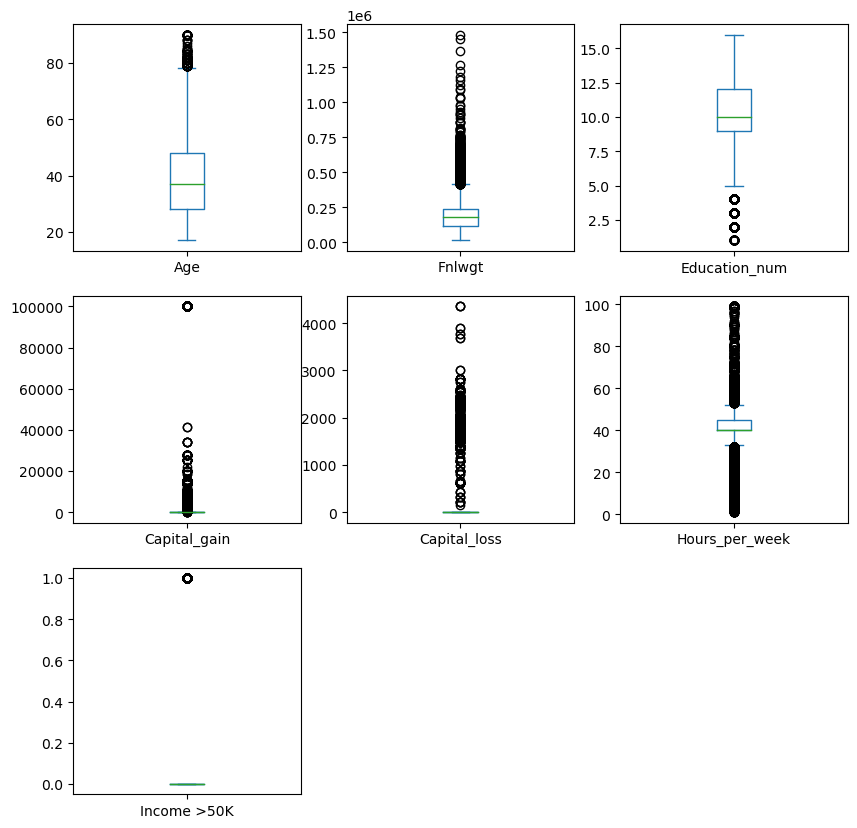

In [17]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10));

## Understanding Feature Relationships

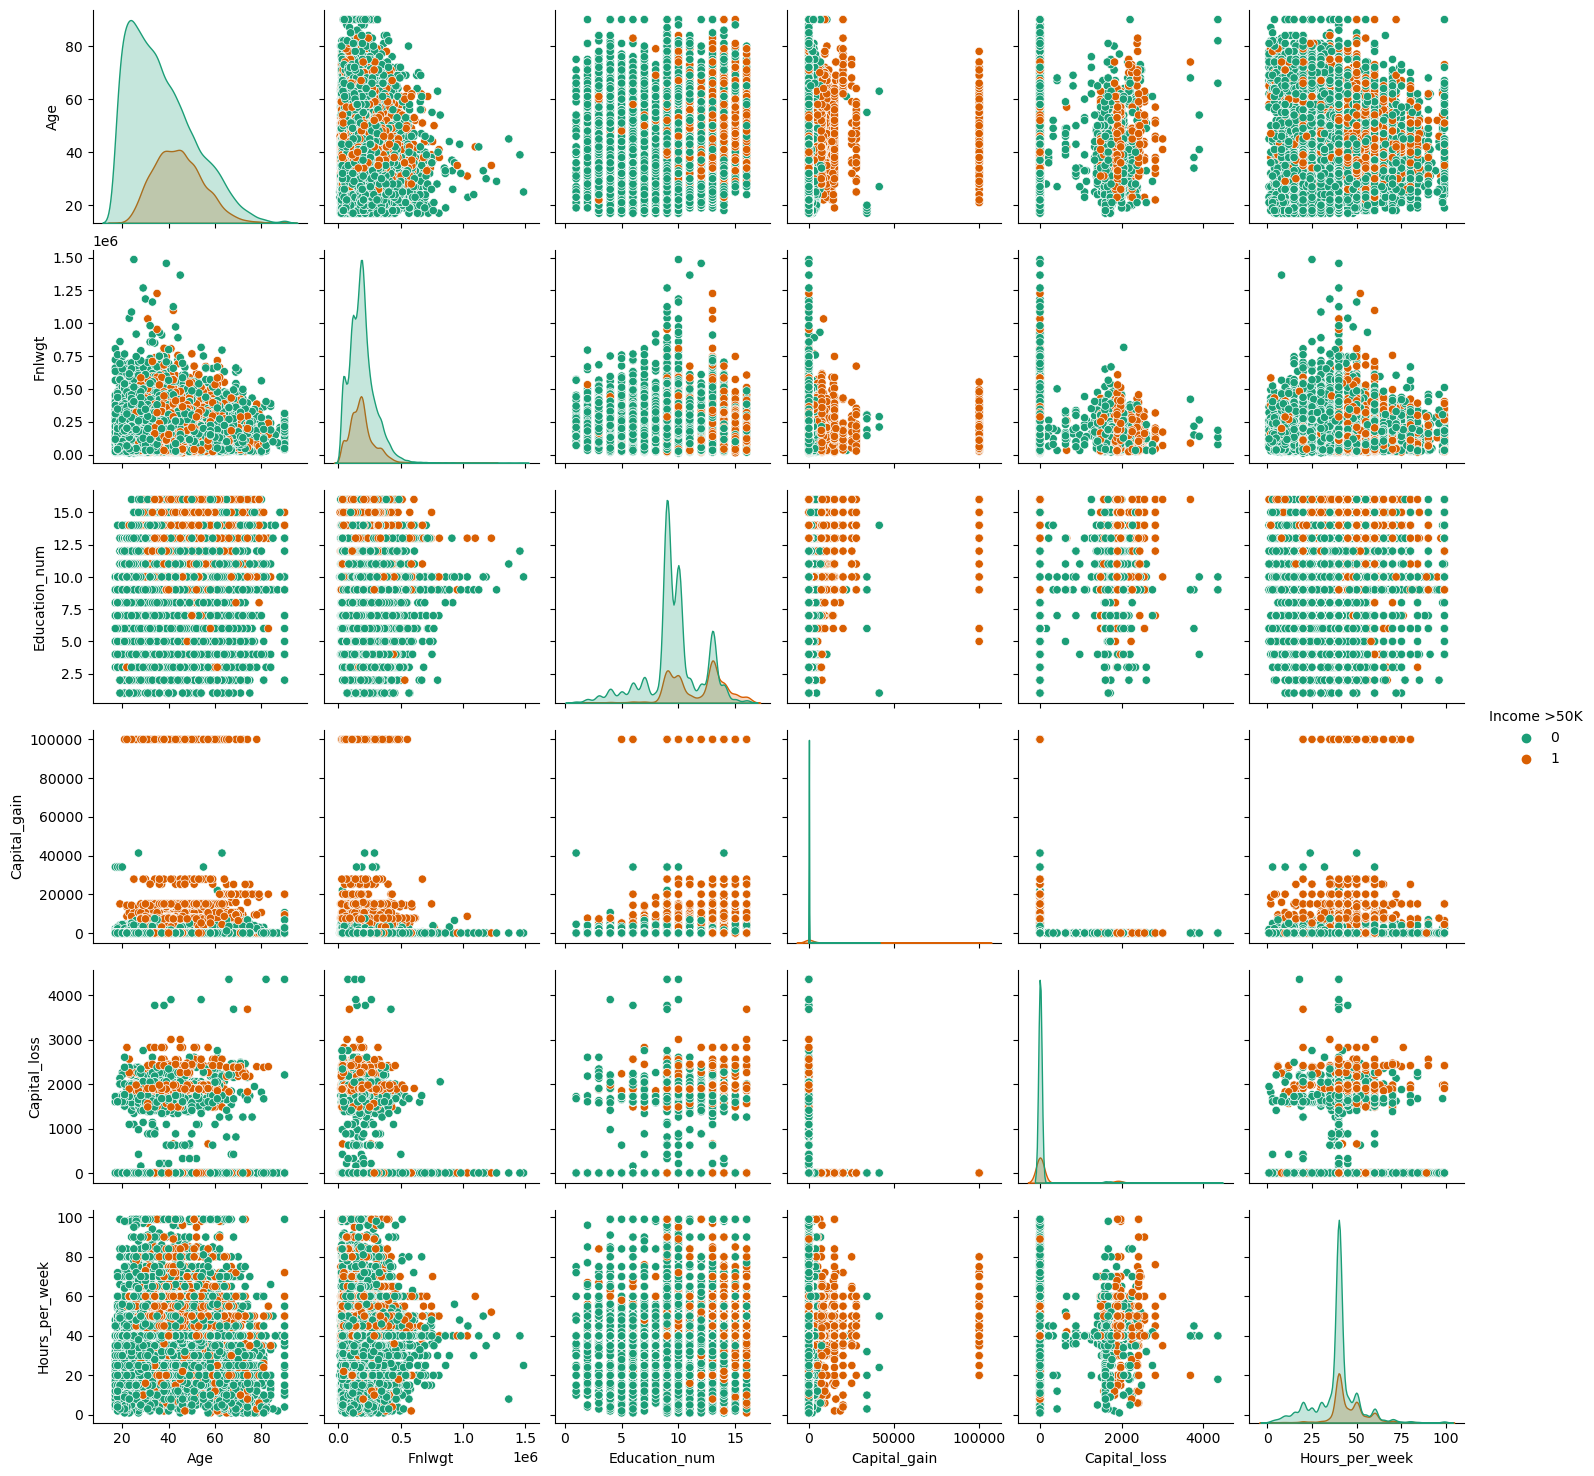

In [18]:
sns.pairplot(df, palette="Dark2", hue='Income >50K');

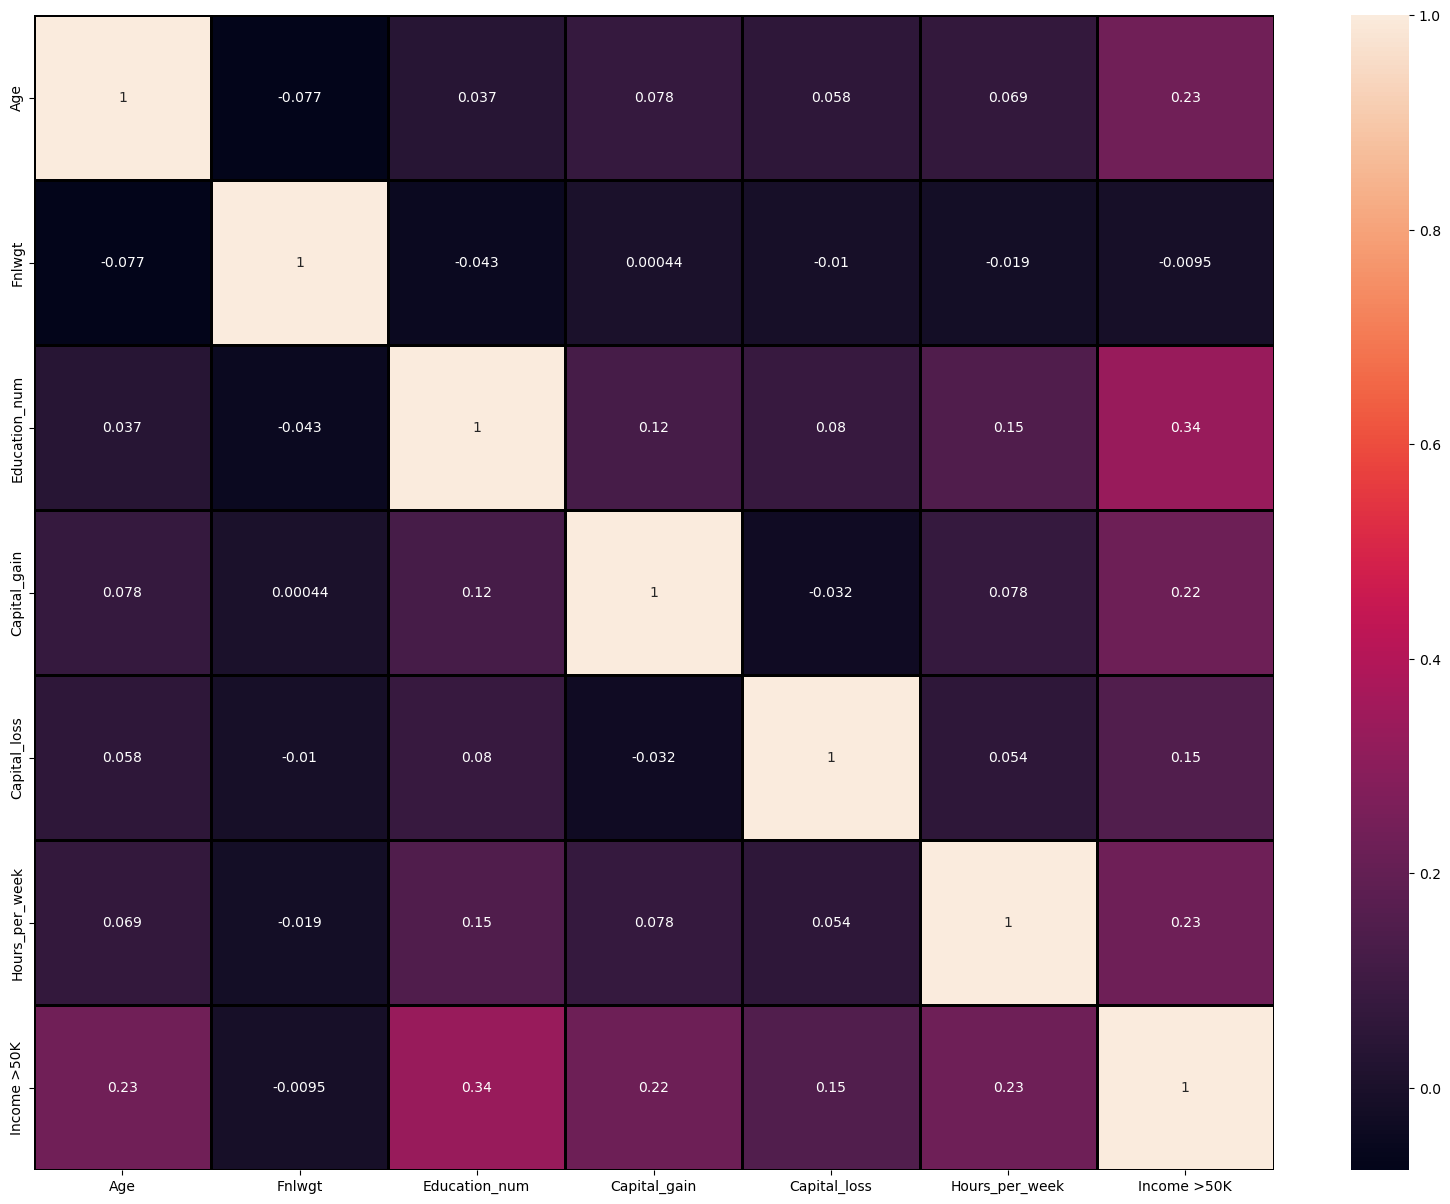

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=1, linecolor='black');

In [20]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income >50K
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0


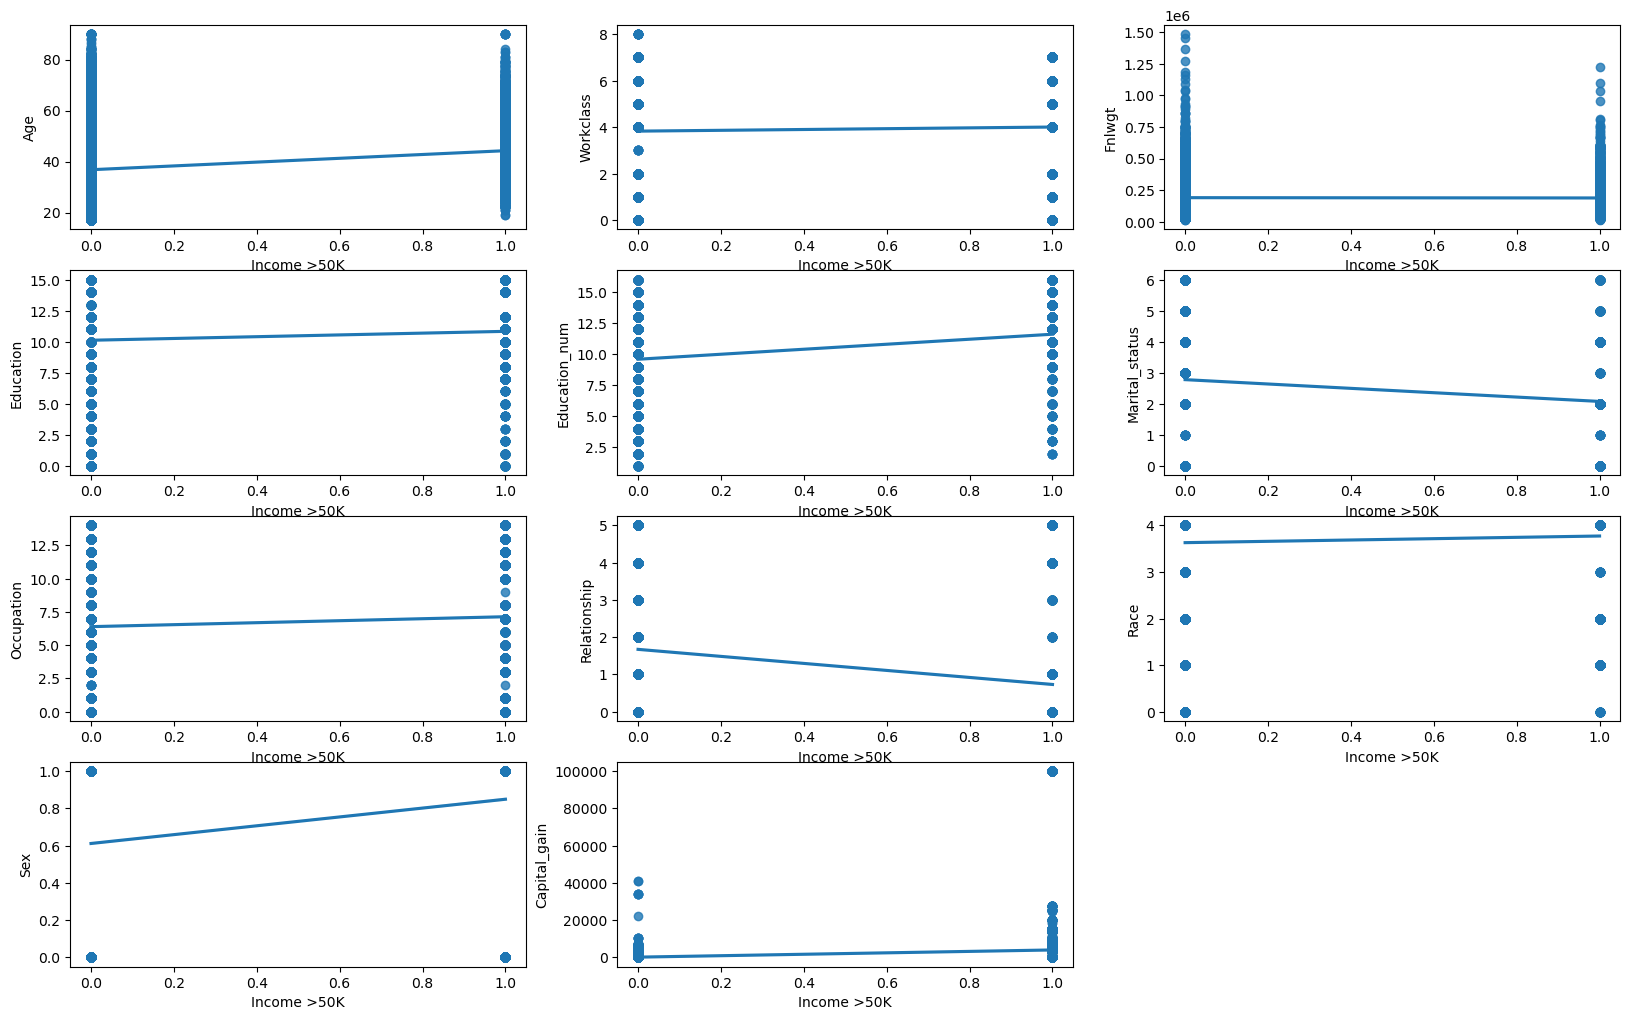

In [21]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(8,3,p)
        sns.regplot(x='Income >50K', y=i, data=df)
        plt.xlabel('Income >50K')
        plt.ylabel(i)
    p+=1
plt.show()

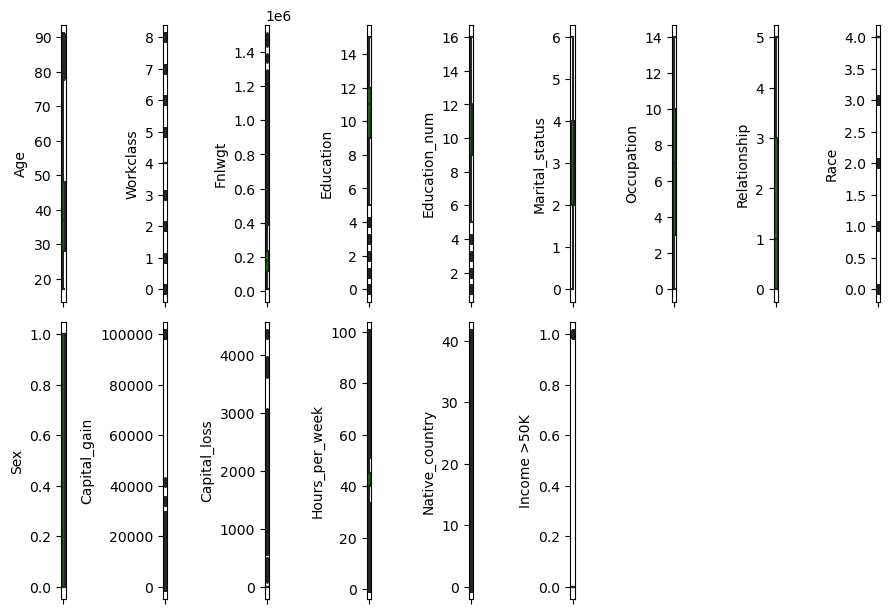

In [22]:
#checking outliers

collist=df.columns.values
ncol= 9
nrows= 9

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=df[collist[i]], color='green', orient='x')
    plt.tight_layout()

## Model Preparation

In [23]:
df_skew = df.skew()
df_skew

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income >50K        1.212383
dtype: float64

In [24]:
for index, value in df_skew.items():
    if value > 0.5 or value < -0.5:
        df[index] = np.cbrt(df[index])
df.skew()

Age               0.090565
Workclass        -2.923788
Fnlwgt           -0.164177
Education        -2.817690
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship     -0.102451
Race             -4.745983
Sex              -0.719244
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
Native_country   -5.061925
Income >50K       1.212383
dtype: float64

In [25]:
x = df.drop(['Income >50K'], axis=1)
y = df[['Income >50K']]

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,51.929179,Age
1,17.026810,Workclass
2,24.399381,Fnlwgt
3,23.994098,Education
4,20.730037,Education_num
5,4.417243,Marital_status
6,3.976388,Occupation
7,3.982004,Relationship
8,49.059380,Race
9,4.825787,Sex


In [27]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [28]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.245962,Age
1,1.177465,Workclass
2,1.010319,Fnlwgt
3,1.223744,Education
4,1.288412,Education_num
5,1.181472,Marital_status
6,1.164421,Occupation
7,1.976885,Relationship
8,1.019570,Race
9,1.676765,Sex


In [29]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
x_resampled, y_resampled = oversampler.fit_resample(x, y)

In [30]:
print(x_resampled.shape)
print(y_resampled.shape)

(49438, 14)
(49438, 1)


In [31]:
x=x_resampled
y=y_resampled

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

## Model Creation

In [33]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose = 0, ignore_warnings=True, custom_metric=None)
models, prediction = clf.fit(xtrain, xtest, ytrain, ytest)
print(models);

 97%|█████████▋| 28/29 [07:07<00:08,  8.27s/it]

[LightGBM] [Info] Number of positive: 18552, number of negative: 18526
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2966
[LightGBM] [Info] Number of data points in the train set: 37078, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500351 -> initscore=0.001402
[LightGBM] [Info] Start training from score 0.001402


100%|██████████| 29/29 [07:08<00:00, 14.77s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.91               0.91     0.91      0.91   
ExtraTreesClassifier               0.91               0.91     0.91      0.91   
LGBMClassifier                     0.91               0.91     0.91      0.91   
RandomForestClassifier             0.90               0.90     0.90      0.90   
LabelSpreading                     0.89               0.89     0.89      0.89   
LabelPropagation                   0.89               0.89     0.89      0.89   
BaggingClassifier                  0.89               0.89     0.89      0.89   
KNeighborsClassifier               0.86               0.86     0.86      0.86   
AdaBoostClassifier                 0.86               0.86     0.86      0.86   
DecisionTreeClassifier             0.86               0.86     0.86      0.86   
ExtraTreeClassifier         

## Model Evaluation

In [34]:
from xgboost import XGBClassifier
XGB_reg = XGBClassifier(random_state = 39)

In [35]:
XGB_reg.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=39, ...)

In [36]:
grid_param = {'max_depth': range (2, 10, 1),
              'n_estimators': range(60, 220, 40),
              'learning_rate': [0.1, 0.01, 0.05]}

In [37]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=XGB_reg, param_grid=grid_param, cv=2, verbose=3)

In [38]:
grid_search.fit(xtrain,ytrain)

Fitting 2 folds for each of 96 candidates, totalling 192 fits
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.835 total time=   0.1s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.839 total time=   0.1s
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.846 total time=   0.3s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.851 total time=   0.3s
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=140;, score=0.854 total time=   0.4s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=140;, score=0.858 total time=   0.4s
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=180;, score=0.862 total time=   0.5s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=180;, score=0.863 total time=   0.5s
[CV 1/2] END learning_rate=0.1, max_depth=3, n_estimators=60;, score=0.848 total time=   0.2s
[CV 2/2] END learning_rate=0.1, max_depth=3, n_estimators=60;, score=0.852 total time=

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=39, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             verbose=3)

In [39]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}

## Final Model

When comparing models Classifier had the highest accuracy at 0.91, balanced accuracy at 0.91, ROC AUC of 0.91, and F1 Score 0.91. It did have a longer training time of 1.87 than the 0.63 of the LGBMClassifier, but that wasn't much of a factor due to the size of the dataset.

In [40]:
Final_model = XGBClassifier(learning_rate=0.1, max_depth=8, n_estimators=180, random_state=39)

In [41]:
from sklearn.metrics import accuracy_score

Final_model.fit(xtrain,ytrain)
pred = Final_model.predict(xtest)
acc = accuracy_score(ytest,pred)
print(acc*100)

91.17313915857605
